In [70]:
import re
import nltk
import collections
import math
from nltk.corpus import reuters
from nltk.corpus import stopwords
import numpy as np
import random
import pickle
from nltk.corpus import reuters

In [116]:
#load the required data
def load_data(master_dict):
    with open(master_dict, "rb") as f:
        data = pickle.load(f)
    return data 

data = load_data("dict.dat")        

In [117]:
#get all the trained variables
embeddings = data['embeddings']
reverse_dictionary = data['reverse_dictionary']
dictionary = data['dictionary']

#delete data to free some memory
del(data)

In [ ]:
documents = reuters.fileids()
train_docs = list(filter(lambda doc: doc.startswith("test"),documents));
all_sents = []
for doc in train_docs:
    sent = reuters.sents(fileids=[doc])
    all_sents = all_sents + list(sent)

In [101]:
#read the input file and store it in a string
def read_file(filename):
    with open(filename, 'r') as myfile:
        text = myfile.read().decode("utf-8").replace('\n', '')
    return text
# add file name in the argument
text = read_file('nltk_data/corpora/reuters/test/14826')
print(text)

ASIAN EXPORTERS FEAR DAMAGE FROM U.S.-JAPAN RIFT  Mounting trade friction between the  U.S. And Japan has raised fears among many of Asia's exporting  nations that the row could inflict far-reaching economic  damage, businessmen and officials said.      They told Reuter correspondents in Asian capitals a U.S.  Move against Japan might boost protectionist sentiment in the  U.S. And lead to curbs on American imports of their products.      But some exporters said that while the conflict would hurt  them in the long-run, in the short-term Tokyo's loss might be  their gain.      The U.S. Has said it will impose 300 mln dlrs of tariffs on  imports of Japanese electronics goods on April 17, in  retaliation for Japan's alleged failure to stick to a pact not  to sell semiconductors on world markets at below cost.      Unofficial Japanese estimates put the impact of the tariffs  at 10 billion dlrs and spokesmen for major electronics firms  said they would virtually halt exports of products hit 

In [103]:
# get the sentences
sents = nltk.sent_tokenize(text)
print(len(sents))

84


In [104]:
# # for each sentence word tokenize it
words = [nltk.word_tokenize(sent) for sent in sents]
print(words)

[[u'ASIAN', u'EXPORTERS', u'FEAR', u'DAMAGE', u'FROM', u'U.S.-JAPAN', u'RIFT', u'Mounting', u'trade', u'friction', u'between', u'the', u'U.S.', u'And', u'Japan', u'has', u'raised', u'fears', u'among', u'many', u'of', u'Asia', u"'s", u'exporting', u'nations', u'that', u'the', u'row', u'could', u'inflict', u'far-reaching', u'economic', u'damage', u',', u'businessmen', u'and', u'officials', u'said', u'.'], [u'They', u'told', u'Reuter', u'correspondents', u'in', u'Asian', u'capitals', u'a', u'U.S.', u'Move', u'against', u'Japan', u'might', u'boost', u'protectionist', u'sentiment', u'in', u'the', u'U.S.', u'And', u'lead', u'to', u'curbs', u'on', u'American', u'imports', u'of', u'their', u'products', u'.'], [u'But', u'some', u'exporters', u'said', u'that', u'while', u'the', u'conflict', u'would', u'hurt', u'them', u'in', u'the', u'long-run', u',', u'in', u'the', u'short-term', u'Tokyo', u"'s", u'loss', u'might', u'be', u'their', u'gain', u'.'], [u'The', u'U.S.', u'Has', u'said', u'it', u'wil

In [105]:
#lowercasing the text
#remove the words if present in stop list
#removing non alphanumeric and numeric text
#getting the indices of the words
StopWords = stopwords.words("english")
index_processed = []
text_processed = []
p = re.compile('[a-zA-Z]+');
for sent in words:
    sent = map(lambda word: word.lower(), sent);
    sent = [word for word in sent if word not in StopWords]
    #doc = [stemmer.stem(word) for word in doc]
    filtered_tokens =list(filter(lambda token:p.match(token),sent));
    text_processed.append(filtered_tokens)
    index = [dictionary[word] if word in dictionary else 0 for word in filtered_tokens]
    index_processed.append(index)

In [106]:
#get sent vectors
sent_vec=[]
for _ in index_processed:
    sent_vec.append(np.sum(embeddings[_],axis=0)/len(_))
sent_vec = np.array(sent_vec)

In [107]:
sent_vec.shape

(84, 256)

In [108]:
#cluster the vectors using k means algo
#choose your own n_clusters 
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 7, random_state=0).fit(sent_vec)

In [113]:
cluster = collections.Counter(kmeans.labels_).most_common(5)
print((cluster))

[(0, 47), (1, 19), (4, 7), (5, 5), (3, 4)]


In [114]:
#get the centroid vector and find the nearest vector to it in cluster
from scipy import spatial
def central_vec(kmeans,cluster):
    c_vec = []
    vec_index = []
    for label,_ in cluster:
        index = [i for i in range(len(kmeans.labels_)) if kmeans.labels_[i] == label ]
        tree = spatial.KDTree(sent_vec[index])
        #print(tree)
        query = np.sum(sent_vec,0)/_
        d,ind = tree.query(query)
        central_vec = sent_vec[index][ind]
        c_vec.append(central_vec)
        vec_index.append(index[ind])
    return c_vec,vec_index
c ,v= np.array(central_vec(kmeans,cluster))
#c.shape
print(v)

[48 16 56 80 19]


In [115]:
#given the req index print the sentences coressponding to it
def print_summary(index):
    for i in index:
        print(sents[i])
        
print_summary(v)

ISUZU PLANS NO INTERIM DIVIDEND  Isuzu Motor Ltd &lt;ISUM.T> will pay no  dividend for the first half year ending April 30, 1987, as the  company is expected to mark a 12 billion yen parent company  current loss in the first half due to slow exports caused by  the yen's appreciation, a company spokesman said.
In Malaysia, trade officers and businessmen said tough  curbs against Japan might allow hard-hit producers of  semiconductors in third countries to expand their sales to the  U.S.
PRESTON CORP &lt;PTRK> SEES FIRST QUARTER LOSS  Preston corp said it expects to  report a loss of about 300,000 dlrs or five cts per share for  the first quarter, compared with a profit of 1,081,000 dlrs or  19 cts per share a year before.
Kellog said the project will enable the refinery to produce  BTX products -- benzene, toluene, and orthoxylene -- by  processing naphtha feed from an expanded reformer-hydrotreater.
"That is a very short-term view," said Lawrence Mills,  director-general of the Federat

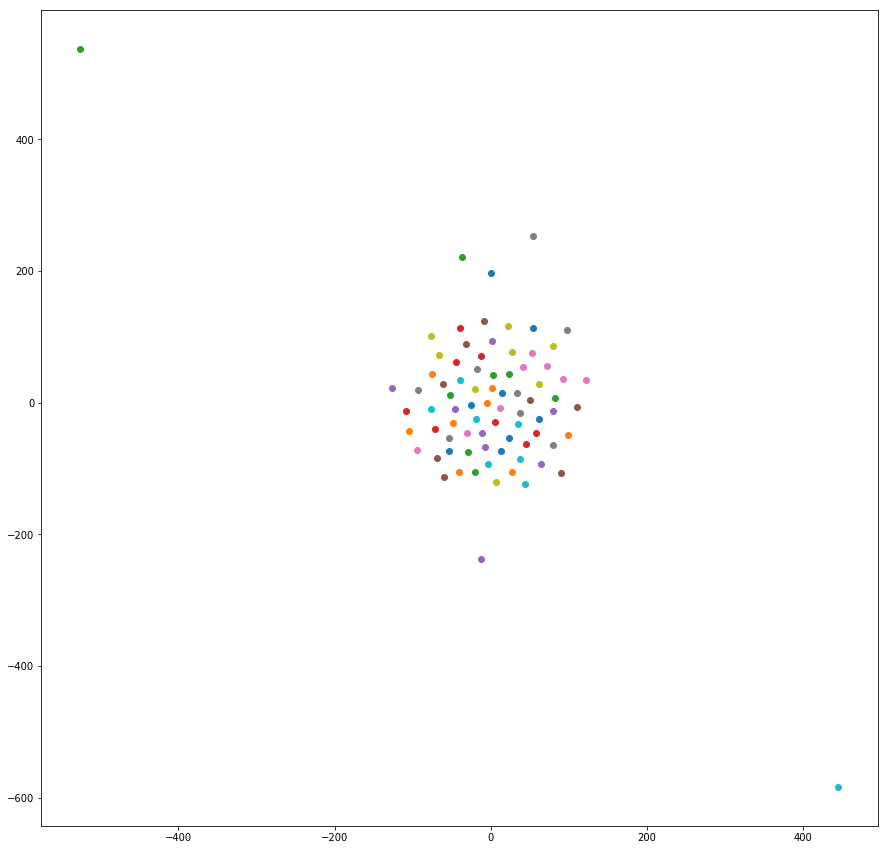

In [112]:
from sklearn.manifold import TSNE
num_points = 80

tsne = TSNE(perplexity=30, n_components=2, init='pca', n_iter=5000)
two_d_embeddings = tsne.fit_transform(sent_vec[1:num_points+1, :])
two_d_embeddings.shape
from matplotlib import pylab
def plot(embeddings):
  #assert embeddings.shape[0] >= len(labels), 'More labels than embeddings'
  pylab.figure(figsize=(15,15))  # in inches
  for i in range(80):
    x, y = embeddings[i,:]
    pylab.scatter(x, y)
    #pylab.annotate(label, xy=(x, y), xytext=(5, 2), textcoords='offset points',
                   #ha='right', va='bottom')
  pylab.show()

#words = [reverse_dictionary[i] for i in range(1, num_points+1)]
plot(two_d_embeddings)